# 🧠 Análisis de Datos Clínicos y Moleculares en Gliomas Difusos

Este proyecto se centra en la exploración de datos clínicos y moleculares de pacientes con **gliomas difusos**, con el objetivo de identificar patrones relevantes relacionados con características clínicas y moleculares sin entrar en análisis ómicos complejos.

> ⚠️ **Estado:** Análisis en progreso; futuras actualizaciones incluirán integración con transcriptómica y proteómica.

---

## 📊 Descripción del Dataset

- **Gliomas difusos:** representan el 80% de los tumores cerebrales malignos en adultos.  
- **Clasificación histológica:** oligodendroglioma, oligoastrocytoma, astrocytoma y glioblastoma.  
- **Grado tumoral:** II a IV, según criterios histológicos de la WHO.  
- **Variabilidad:** alta variabilidad intra- e inter-observador, especialmente en tumores de grado II-III.  
- **Origen de los datos:** The Cancer Genome Atlas (TCGA).  

---

## 🧬 Variables Analizadas

| Variable               | Tipo/Valores relevantes |
|------------------------|------------------------|
| years_to_birth         | numérico               |
| gender                 | categórico             |
| histological_type      | categórico             |
| race                   | categórico             |
| ethnicity              | categórico             |
| radiation_therapy      | categórico             |
| Grade                  | II-III                  |
| Mutation.Count         | numérico               |
| Percent.aneuploidy     | numérico               |
| IDH.status             | categórico             |
| outcome                | dicotómico             |

---

## 📌 Hallazgos Iniciales

1. **Supervivencia por tipo histológico:**  
   - Oligodendroglioma: 100% supervivencia.  
   - Astrocytoma y oligoastrocytoma: 100% mortalidad.  

2. **Radioterapia:**  
   - Los pacientes que recibieron radioterapia mostraron mayor mortalidad relativa, asociada a que la mayoría correspondía a casos con grado histológico más avanzado (G3).  

3. **Edad y subtipo histológico:**  
   - Los pacientes fallecidos tienden a ser más jóvenes, probablemente porque los tipos histológicos más agresivos afectan con mayor frecuencia a pacientes jóvenes.  

4. **Carga mutacional:**  
   - Tendencia a mayor número de mutaciones en pacientes fallecidos, aunque no significativa.  

5. **Estado IDH:**  
   - La mutación en IDH se asocia con mejor pronóstico; los tumores IDH wild-type se vinculan a mayor mortalidad.  

---

## 📊 Resultados de Pruebas de Hipótesis

- **Edad:**  
  - Mann–Whitney U, p = 0.012 → pacientes fallecidos ligeramente más jóvenes que los sobrevivientes.  

- **Número de mutaciones:**  
  - Mann–Whitney U, p = 0.22 → sin diferencia significativa.  

- **Grado y tipo histológico:**  
  - Chi-cuadrada, p < 0.001 → supervivencia significativamente mayor en oligodendroglioma; mortalidad concentrada en astrocytoma y oligoastrocytoma.  
  - Tipo histológico asociado a grado tumoral, p < 0.00001.  

- **Radioterapia:**  
  - Chi-cuadrada, p < 1e-10 → radioterapia asociada a tumores más agresivos.  
  - Comparación de supervivencia por radioterapia: p < 0.001.  

- **Estado IDH:**  
  - Chi-cuadrada, p = 0.003 → mutación IDH asociada a mejor pronóstico.  

- **Sexo, raza y etnia:**  
  - Sin diferencias significativas en supervivencia.  

- **Porcentaje de aneuploidía:**  
  - Mann–Whitney U, p = 0.633 → sin diferencias significativas.  

---

## 🔍 Interpretación Integrada

1. **Edad y tipo histológico:** factores interrelacionados que afectan la supervivencia: los pacientes más jóvenes tienden a presentar gliomas más agresivos.  
2. **Biomarcadores:** mutación en IDH es favorable; tipo histológico y grado tumoral son los principales determinantes de desenlace clínico.  
3. **Variables demográficas:** género, raza y etnia tienen poca influencia individual.  
4. **Tratamiento:** radioterapia refleja la severidad del caso, no un efecto adverso directo.  
5. **Carga mutacional y aneuploidía:** no son determinantes independientes del pronóstico en este cohort.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\HP\Desktop\Análisis multiomicos\Análisis multi-ómico de gliomas difusos\Glioma.csv")
data.head()

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,...,TSC1,TSC2,WWTR1,XRCC1,XRCC5,YAP1,YBX1,YWHAB,YWHAE,YWHAZ
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,...,1455.8422,1825.0472,1514.6130,759.8070,6062.5131,2080.1343,7140.3398,10055.3807,30969.1630,9261.5901
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,...,1194.3738,1685.1381,526.3176,693.4418,6973.3943,545.6702,11239.4509,8656.4989,19796.6446,12575.4957
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,...,1088.2018,2360.8727,905.4451,804.4670,6655.3614,730.4312,9499.7415,7289.4220,20114.1557,18329.4385
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,...,1397.5452,2081.1456,414.7801,793.3856,4214.4562,753.8357,4590.5217,11778.0430,22488.9192,12954.6539
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,...,1064.6498,1486.5313,4793.0874,1002.0721,5197.6792,1442.1881,9880.2321,7364.2768,30595.9387,9029.4240


In [3]:
data.shape

(306, 331)

In [4]:
columnas = data.columns
c_c_m= columnas[0:12]

In [5]:
datos_clinico_moleculares = data[c_c_m]
datos_clinico_moleculares.head()

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,IDH.status,outcome
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,Mutant,1
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,Mutant,1
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,Mutant,1
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,Mutant,1
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,Mutant,1


In [6]:
datos_clinico_moleculares.nunique()

Case                  306
years_to_birth         57
gender                  2
histological_type       3
race                    3
ethnicity               2
radiation_therapy       2
Grade                   2
Mutation.Count         61
Percent.aneuploidy    306
IDH.status              2
outcome                 2
dtype: int64

In [7]:
datos_clinico_moleculares.groupby('histological_type')['histological_type'].count()

histological_type
astrocytoma           90
oligoastrocytoma      94
oligodendroglioma    122
Name: histological_type, dtype: int64

In [8]:
datos_clinico_moleculares.groupby('outcome')['outcome'].count()

outcome
0    122
1    184
Name: outcome, dtype: int64

In [9]:
def _violinplot(df, x, y, n1,n2,
    yticklabels: list[str] | None = None,
    plot_dps: bool = True,
) -> None:
    sns.violinplot(data=df, x=x, y=y, inner=None, ax=axs[n1,n2])
    if plot_dps:
        sns.stripplot(data=df, x=x, y=y, color="black", ax=axs[n1,n2])
    axs[n1,n2].set_title(f'Supervivencia vs {y}')



In [10]:
def caja(df,x,y, n1,n2):
    sns.boxplot(x=df[x], y=df[y], ax=axs[n1,n2])
    axs[n1,n2].set_title(f'Supervivencia vs {y}')


14 86


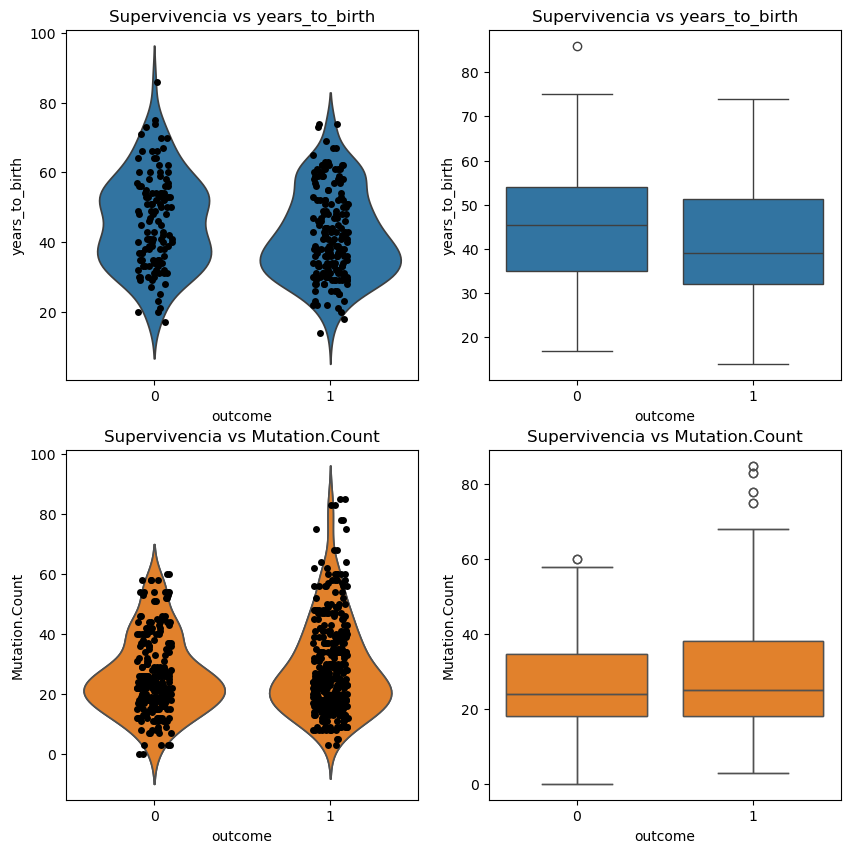

In [11]:
figure, axs = plt.subplots( 2,2, sharey=False, sharex=False, figsize=(10, 10))
print(datos_clinico_moleculares['years_to_birth'].min(), datos_clinico_moleculares['years_to_birth'].max())

_violinplot(datos_clinico_moleculares, 'outcome', 'years_to_birth', 0,0)
caja(datos_clinico_moleculares,'outcome', 'years_to_birth', 0, 1)

_violinplot(datos_clinico_moleculares, 'outcome', 'Mutation.Count', 1,0)
caja(datos_clinico_moleculares,'outcome', 'Mutation.Count', 1, 1)


_violinplot(datos_clinico_moleculares, 'outcome', 'Mutation.Count', 1,0)
caja(datos_clinico_moleculares,'outcome', 'Mutation.Count', 1, 1)

1. **Edad (years_to_birth):**

Los gráficos tipo violin y boxplot muestran que los pacientes fallecidos tienden a ser de menor edad en comparación con los sobrevivientes. Esto puede deberse a un sesgo por subtipo (p. ej. ciertos gliomas de alto grado que afectan a pacientes más jóvenes) o a diferencias en tratamientos/diagnóstico.

2. **Carga mutacional (Mutation Count):**

Los pacientes fallecidos presentan una ligera tendencia a mayor número de mutaciones, aunque con una gran dispersión. Esto podría reflejar que una mayor inestabilidad genómica se relaciona con peor desenlace clínico, aunque no parece ser el factor más discriminante por sí solo. Para comprobar esto se hara un test no paramétrico de Mann–Whitney U

In [12]:
def graf_barras_x_dead_rel(df, x1, x2, y1, n1, n2):
    
    df_g = df.groupby([x2, x1])[y1].nunique().reset_index()
    df_g[x2] = df_g[x2].map({0: "Vivo", 1: "Muerto"})

    df_rel = df_g.copy()
    df_rel['rel'] = df_rel.groupby(x1)[y1].transform(lambda x: x / x.sum())

    # Graficamos (relativo)
    sns.barplot(data=df_rel, x=x1, y="rel", hue=x2, ax=axs[n1, n2])

    # Formato
    axs[n1, n2].set_ylabel("Proporción")
    axs[n1, n2].set_title(f'Distribución relativa de {x1}')
    axs[n1, n2].yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")
    axs[n1,n2].legend(bbox_to_anchor=(1, 0.2), loc='upper left')
    axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
    axs[n1,n2].set_title(f'frecuencia relativa de supervivencia: {x1}')

C:\Users\HP\AppData\Local\Temp\ipykernel_21480\378769568.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_21480\378769568.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_21480\378769568.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_21480\378769568.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or us

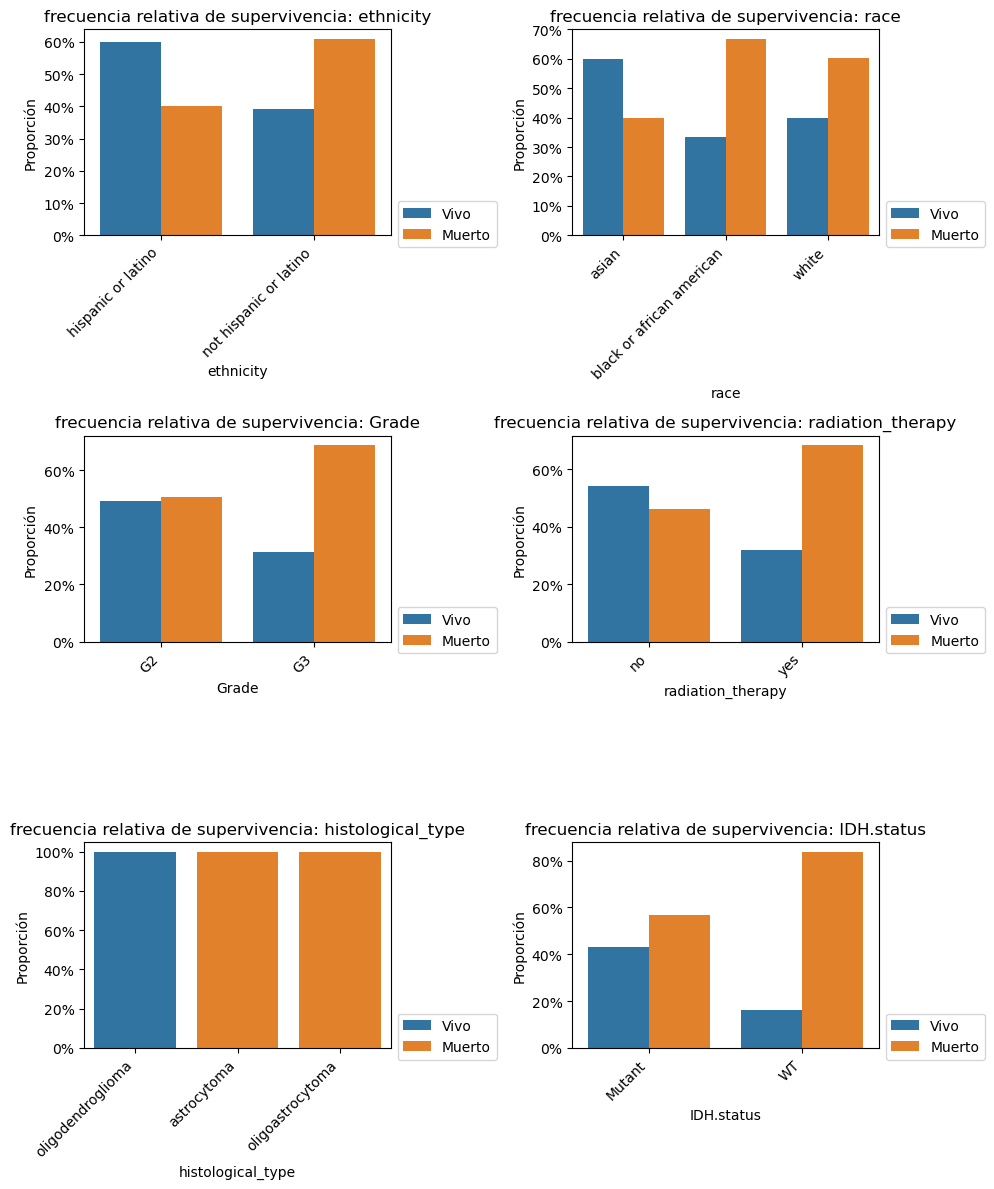

In [13]:
figure, axs = plt.subplots( 3,2, sharey=False, sharex=False, figsize=(10, 12))
graf_barras_x_dead_rel(datos_clinico_moleculares, 'ethnicity', 'outcome', 'Case',  0,0)
graf_barras_x_dead_rel(datos_clinico_moleculares, 'race', 'outcome', 'Case',  0,1)
graf_barras_x_dead_rel(datos_clinico_moleculares, 'Grade', 'outcome', 'Case',  1,0)
graf_barras_x_dead_rel(datos_clinico_moleculares, 'radiation_therapy', 'outcome', 'Case',  1,1)
graf_barras_x_dead_rel(datos_clinico_moleculares, 'histological_type', 'outcome', 'Case',  2,0)
graf_barras_x_dead_rel(datos_clinico_moleculares, 'IDH.status', 'outcome', 'Case',  2,1)
plt.tight_layout()
plt.show()

In [14]:
def graf_barras_x_rel(df, x1, x2, y1, n1, n2):
    
    df_g = df.groupby([x2, x1])[y1].nunique().reset_index()

    df_rel = df_g.copy()
    df_rel['rel'] = df_rel.groupby(x1)[y1].transform(lambda x: x / x.sum())

    # Graficamos (relativo)
    sns.barplot(data=df_rel, x=x1, y="rel", hue=x2, ax=axs[n1, n2])

    # Formato
    axs[n1, n2].set_ylabel("Proporción")
    axs[n1, n2].set_title(f'Distribución relativa de {x1}')
    axs[n1, n2].yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")
    axs[n1,n2].legend(bbox_to_anchor=(1, 0.2), loc='upper left')
    axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
    axs[n1,n2].set_title(f'frecuencia relativa de supervivencia: {x1}')

In [15]:
datos_clinico_moleculares.columns

Index(['Case', 'years_to_birth', 'gender', 'histological_type', 'race',
       'ethnicity', 'radiation_therapy', 'Grade', 'Mutation.Count',
       'Percent.aneuploidy', 'IDH.status', 'outcome'],
      dtype='object')

In [16]:
def graf_barras(df, x, x2, x3, y, n1, n2, t):
    # Agrupamos y contamos pacientes
    df_g = df.groupby([x, x2 ])[y].nunique().reset_index()

    # Graficamos
    sns.barplot(data=df_g, x=x2, y=y, hue =x, ax=axs[n1, n2])
    axs[n1, n2].set_title(f'Distribución {t} de {x}')
    axs[n1,n2].legend(bbox_to_anchor=(1, 0.2), loc='upper left')
    axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')

In [17]:
def graf_barras(df, x, x2, y, n1, n2, t):
    # Agrupamos y contamos pacientes
    df_g = df.groupby([x, x2])[y].nunique().reset_index()

    # Graficamos
    sns.barplot(data=df_g, x=x2, y=y, hue =x, ax=axs[n1, n2])
    axs[n1, n2].set_title(f'Distribución {t} de {x}')
    axs[n1,n2].legend(bbox_to_anchor=(1, 0.2), loc='upper left')
    axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
    

In [18]:
datos_clinico_moleculares['histological_type'].unique()

array(['astrocytoma', 'oligoastrocytoma', 'oligodendroglioma'],
      dtype=object)

C:\Users\HP\AppData\Local\Temp\ipykernel_21480\2555614344.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_21480\3685546853.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_21480\2555614344.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[n1,n2].set_xticklabels(axs[n1,n2].get_xticklabels(), rotation=45, ha='right')
C:\Users\HP\AppData\Local\Temp\ipykernel_21480\3685546853.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or 

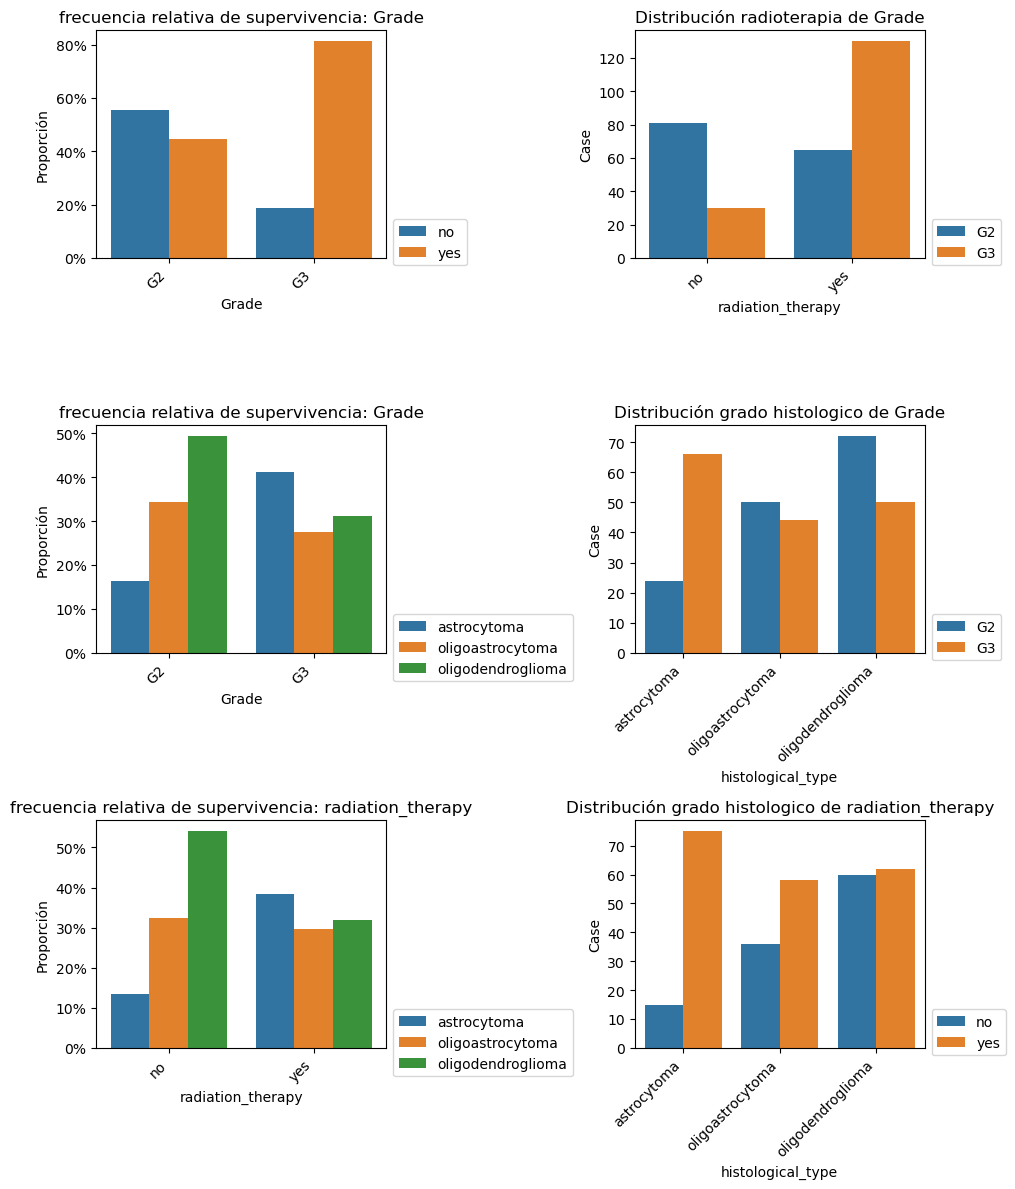

In [19]:
figure, axs = plt.subplots( 3,2, sharey=False, sharex=False, figsize=(10, 12))
graf_barras_x_rel(datos_clinico_moleculares, 'Grade', 'radiation_therapy', 'Case',  0,0)
graf_barras(datos_clinico_moleculares, 'Grade', 'radiation_therapy', 'Case',  0,1, 'radioterapia')



graf_barras_x_rel(datos_clinico_moleculares, 'Grade', 'histological_type', 'Case',  1,0)
graf_barras(datos_clinico_moleculares, 'Grade', 'histological_type', 'Case',  1,1, 'grado histologico')


graf_barras_x_rel(datos_clinico_moleculares, 'radiation_therapy', 'histological_type', 'Case',  2,0)
graf_barras(datos_clinico_moleculares, 'radiation_therapy', 'histological_type', 'Case',  2,1, 'grado histologico')
plt.tight_layout()
plt.show()

## Heatmap de Variables Clínicas

In [20]:
datos_clinico_moleculares['radiation_therapy_N'] = datos_clinico_moleculares['radiation_therapy'].map({'no': 0, 'yes': 1})
datos_clinico_moleculares['Grade_N'] = datos_clinico_moleculares['Grade'].map({'G2': 0, 'G3': 1})


datos_clinico_moleculares['gender_N'] = datos_clinico_moleculares['gender'].map({'female': 0, 'male': 1})
datos_clinico_moleculares['IDH.status_N'] = datos_clinico_moleculares['IDH.status'].map({'WT': 0, 'Mutant': 1})

dummies = pd.get_dummies(
        datos_clinico_moleculares['histological_type'],
        prefix='histological_type',
        dtype=int  # <--- aquí fuerzas que sean 0/1 numéricos
    )

datos_clinico_moleculares = pd.concat([datos_clinico_moleculares, dummies], axis=1)
datos_clinico_moleculares


C:\Users\HP\AppData\Local\Temp\ipykernel_21480\307495883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_clinico_moleculares['radiation_therapy_N'] = datos_clinico_moleculares['radiation_therapy'].map({'no': 0, 'yes': 1})
C:\Users\HP\AppData\Local\Temp\ipykernel_21480\307495883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_clinico_moleculares['Grade_N'] = datos_clinico_moleculares['Grade'].map({'G2': 0, 'G3': 1})
C:\Users\HP\AppData\Local\Temp\ipykernel_21480\307495883.py:5: SettingWit

,Case,years_to_birth,gender,histological_type,race,ethnicity,radiation_therapy,Grade,Mutation.Count,Percent.aneuploidy,IDH.status,outcome,radiation_therapy_N,Grade_N,gender_N,IDH.status_N,histological_type_astrocytoma,histological_type_oligoastrocytoma,histological_type_oligodendroglioma
0,TCGA-CS-4938,31,female,astrocytoma,white,not hispanic or latino,no,G2,15,0.069412,Mutant,1,0,0,0,1,1,0,0
1,TCGA-CS-6665,51,female,astrocytoma,white,not hispanic or latino,yes,G3,75,0.524814,Mutant,1,1,1,0,1,1,0,0
2,TCGA-CS-6666,22,male,astrocytoma,white,not hispanic or latino,yes,G3,18,0.403165,Mutant,1,1,1,1,1,1,0,0
3,TCGA-DB-5270,38,female,oligoastrocytoma,white,not hispanic or latino,no,G3,16,0.061382,Mutant,1,0,1,0,1,0,1,0
4,TCGA-DB-5273,33,male,astrocytoma,white,not hispanic or latino,yes,G3,16,0.017349,Mutant,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,TCGA-TM-A7C5,30,male,oligoastrocytoma,white,not hispanic or latino,no,G2,21,0.142862,Mutant,1,0,0,1,1,0,1,0
302,TCGA-TM-A84R,46,male,oligodendroglioma,white,not hispanic or latino,no,G2,3,0.085319,Mutant,0,0,0,1,1,0,0,1
303,TCGA-TM-A84S,36,male,oligodendroglioma,white,not hispanic or latino,no,G3,11,0.083868,Mutant,0,0,1,1,1,0,0,1
304,TCGA-VV-A829,44,male,oligoastrocytoma,white,not hispanic or latino,yes,G3,27,0.131174,Mutant,1,1,1,1,1,0,1,0


In [21]:
datos_clinico_moleculares.columns

Index(['Case', 'years_to_birth', 'gender', 'histological_type', 'race',
       'ethnicity', 'radiation_therapy', 'Grade', 'Mutation.Count',
       'Percent.aneuploidy', 'IDH.status', 'outcome', 'radiation_therapy_N',
       'Grade_N', 'gender_N', 'IDH.status_N', 'histological_type_astrocytoma',
       'histological_type_oligoastrocytoma',
       'histological_type_oligodendroglioma'],
      dtype='object')

<Axes: >

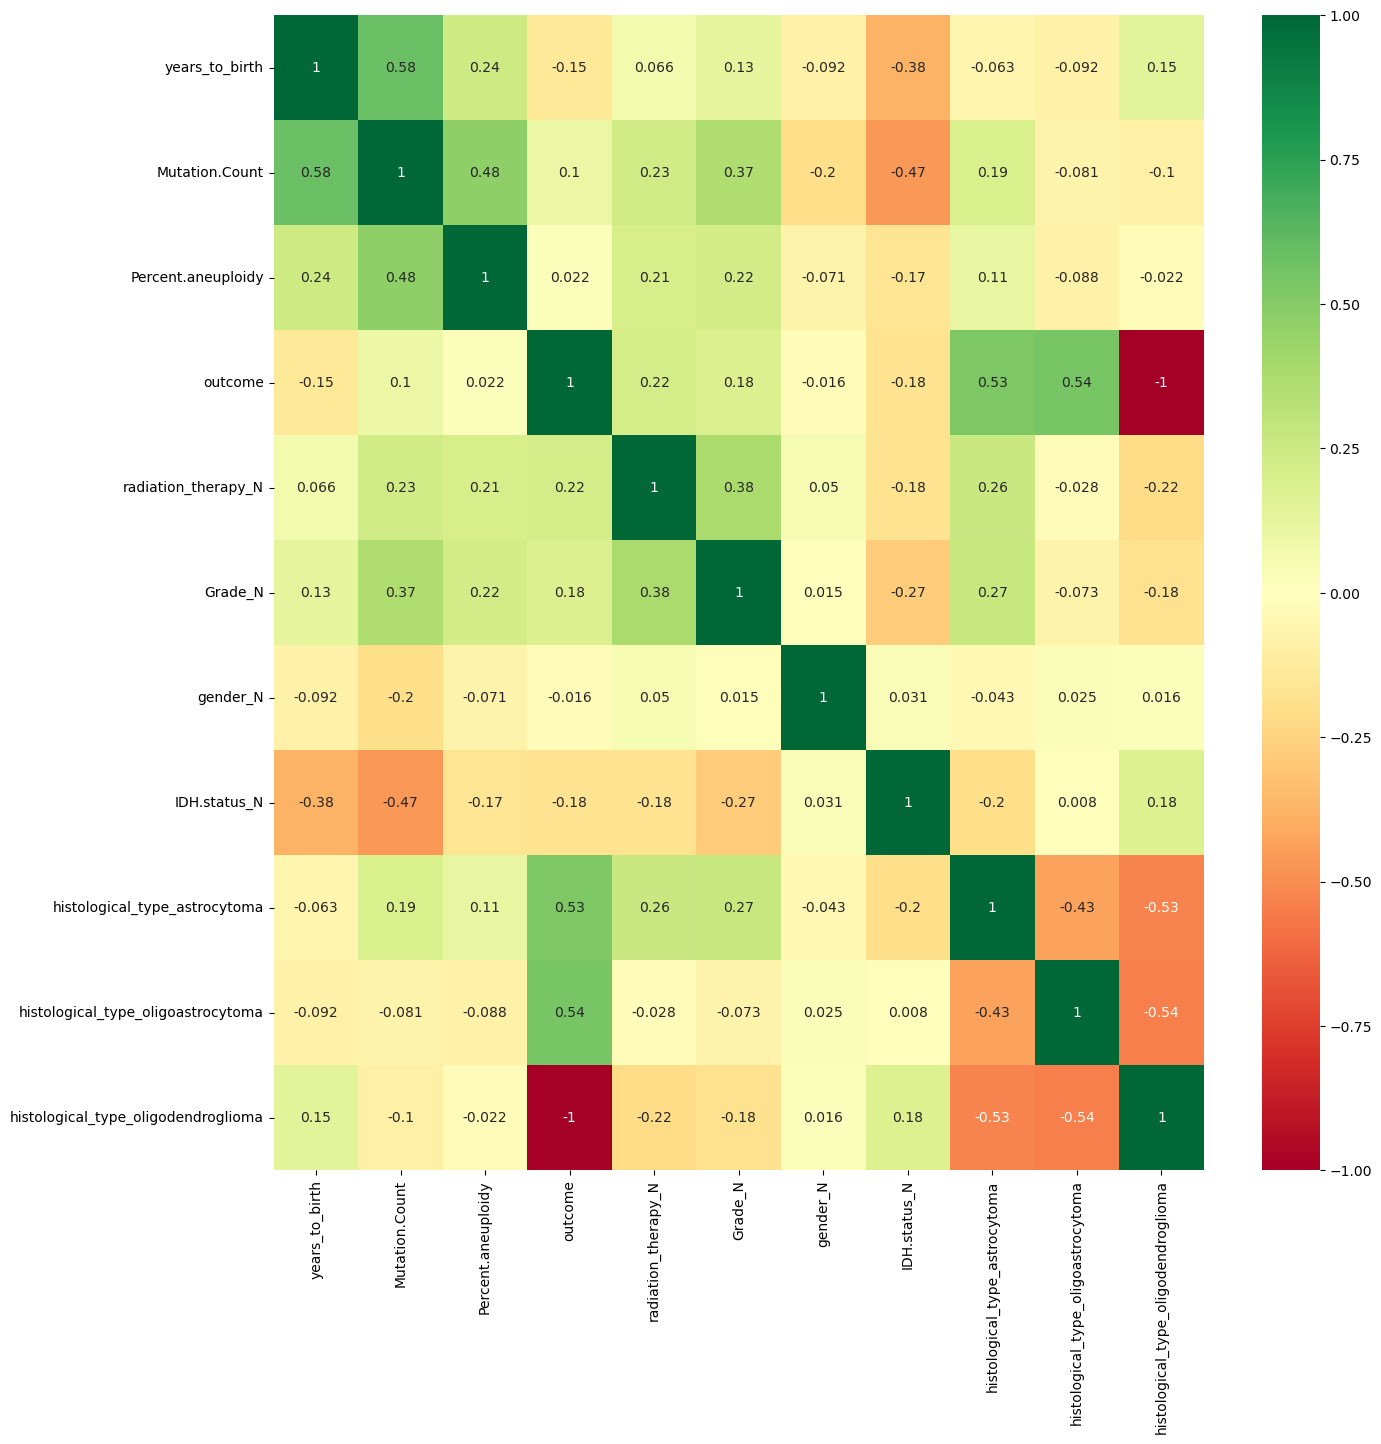

In [22]:
columnas = ['years_to_birth', 'Mutation.Count',
       'Percent.aneuploidy', 'outcome', 'radiation_therapy_N',
       'Grade_N', 'gender_N', 'IDH.status_N', 'histological_type_astrocytoma', 'histological_type_oligoastrocytoma', 'histological_type_oligodendroglioma']

corr_datos_clinico = datos_clinico_moleculares[columnas].corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr_datos_clinico, cmap='RdYlGn', center=0, annot =True)

1. **Grado tumoral:** 

Los pacientes con tumores de grado G3 presentan una proporción mayor de fallecimientos en comparacion con el grado G2.

2. **Estado IDH:** 

Los pacientes con mutación en IDH se asocian predominantemente con el grupo sobreviviente, mientras que los IDH wild-type se vinculan con mayor mortalidad, consistente con el valor pronóstico favorable del gen IDH mutado en gliomas.

3. **Radioterapia:** 

Los pacientes que recibieron radioterapia son mayoritariamente del grupo fallecido, lo que no implica un efecto negativo del tratamiento, sino que los casos más agresivos o avanzados son los que requieren radioterapia.

3. **Tipo histológico:** 

Los oligodendrogliomas concentran los pacientes vivos, mientras que los glioblastomas agrupan la mayoría de los fallecidos.

# **Conclusion parte 1**
El análisis de las variables clínicas y moleculares indica patrones consistentes con el conocimiento actual sobre gliomas:

1. **Tipo histológico y grado tumoral:**

Los oligodendrogliomas se asociaron con supervivencia completa, mientras que los astrocytomas y oligoastrocytomas mostraron mortalidad total.

Los tumores de grado G3 presentaron una proporción significativamente mayor de fallecimientos en comparación con los de grado G2, confirmando la asociación entre mayor agresividad histológica y peor pronóstico.

2. **Edad:**

Los pacientes fallecidos tienden a ser de menor edad, posiblemente debido a un sesgo de subtipo o diferencias en la agresividad del tumor y los tratamientos recibidos.

3. **Carga mutacional (Mutation Count):**

Se observa una tendencia a mayor número de mutaciones en pacientes fallecidos, lo que podría reflejar mayor inestabilidad genómica. Sin embargo, la dispersión es alta y la carga mutacional por sí sola no parece ser un factor discriminante fuerte.

4. **Estado IDH:**

La mutación en IDH se asoció predominantemente con supervivencia, mientras que los tumores IDH wild-type se vincularon con mayor mortalidad, consistente con su papel como biomarcador pronóstico favorable en gliomas.

5. **Radioterapia:**

La mayor proporción de fallecimientos en pacientes que recibieron radioterapia refleja que este tratamiento se administra principalmente a tumores más agresivos o avanzados, y no indica un efecto adverso del tratamiento en sí.

<Axes: >

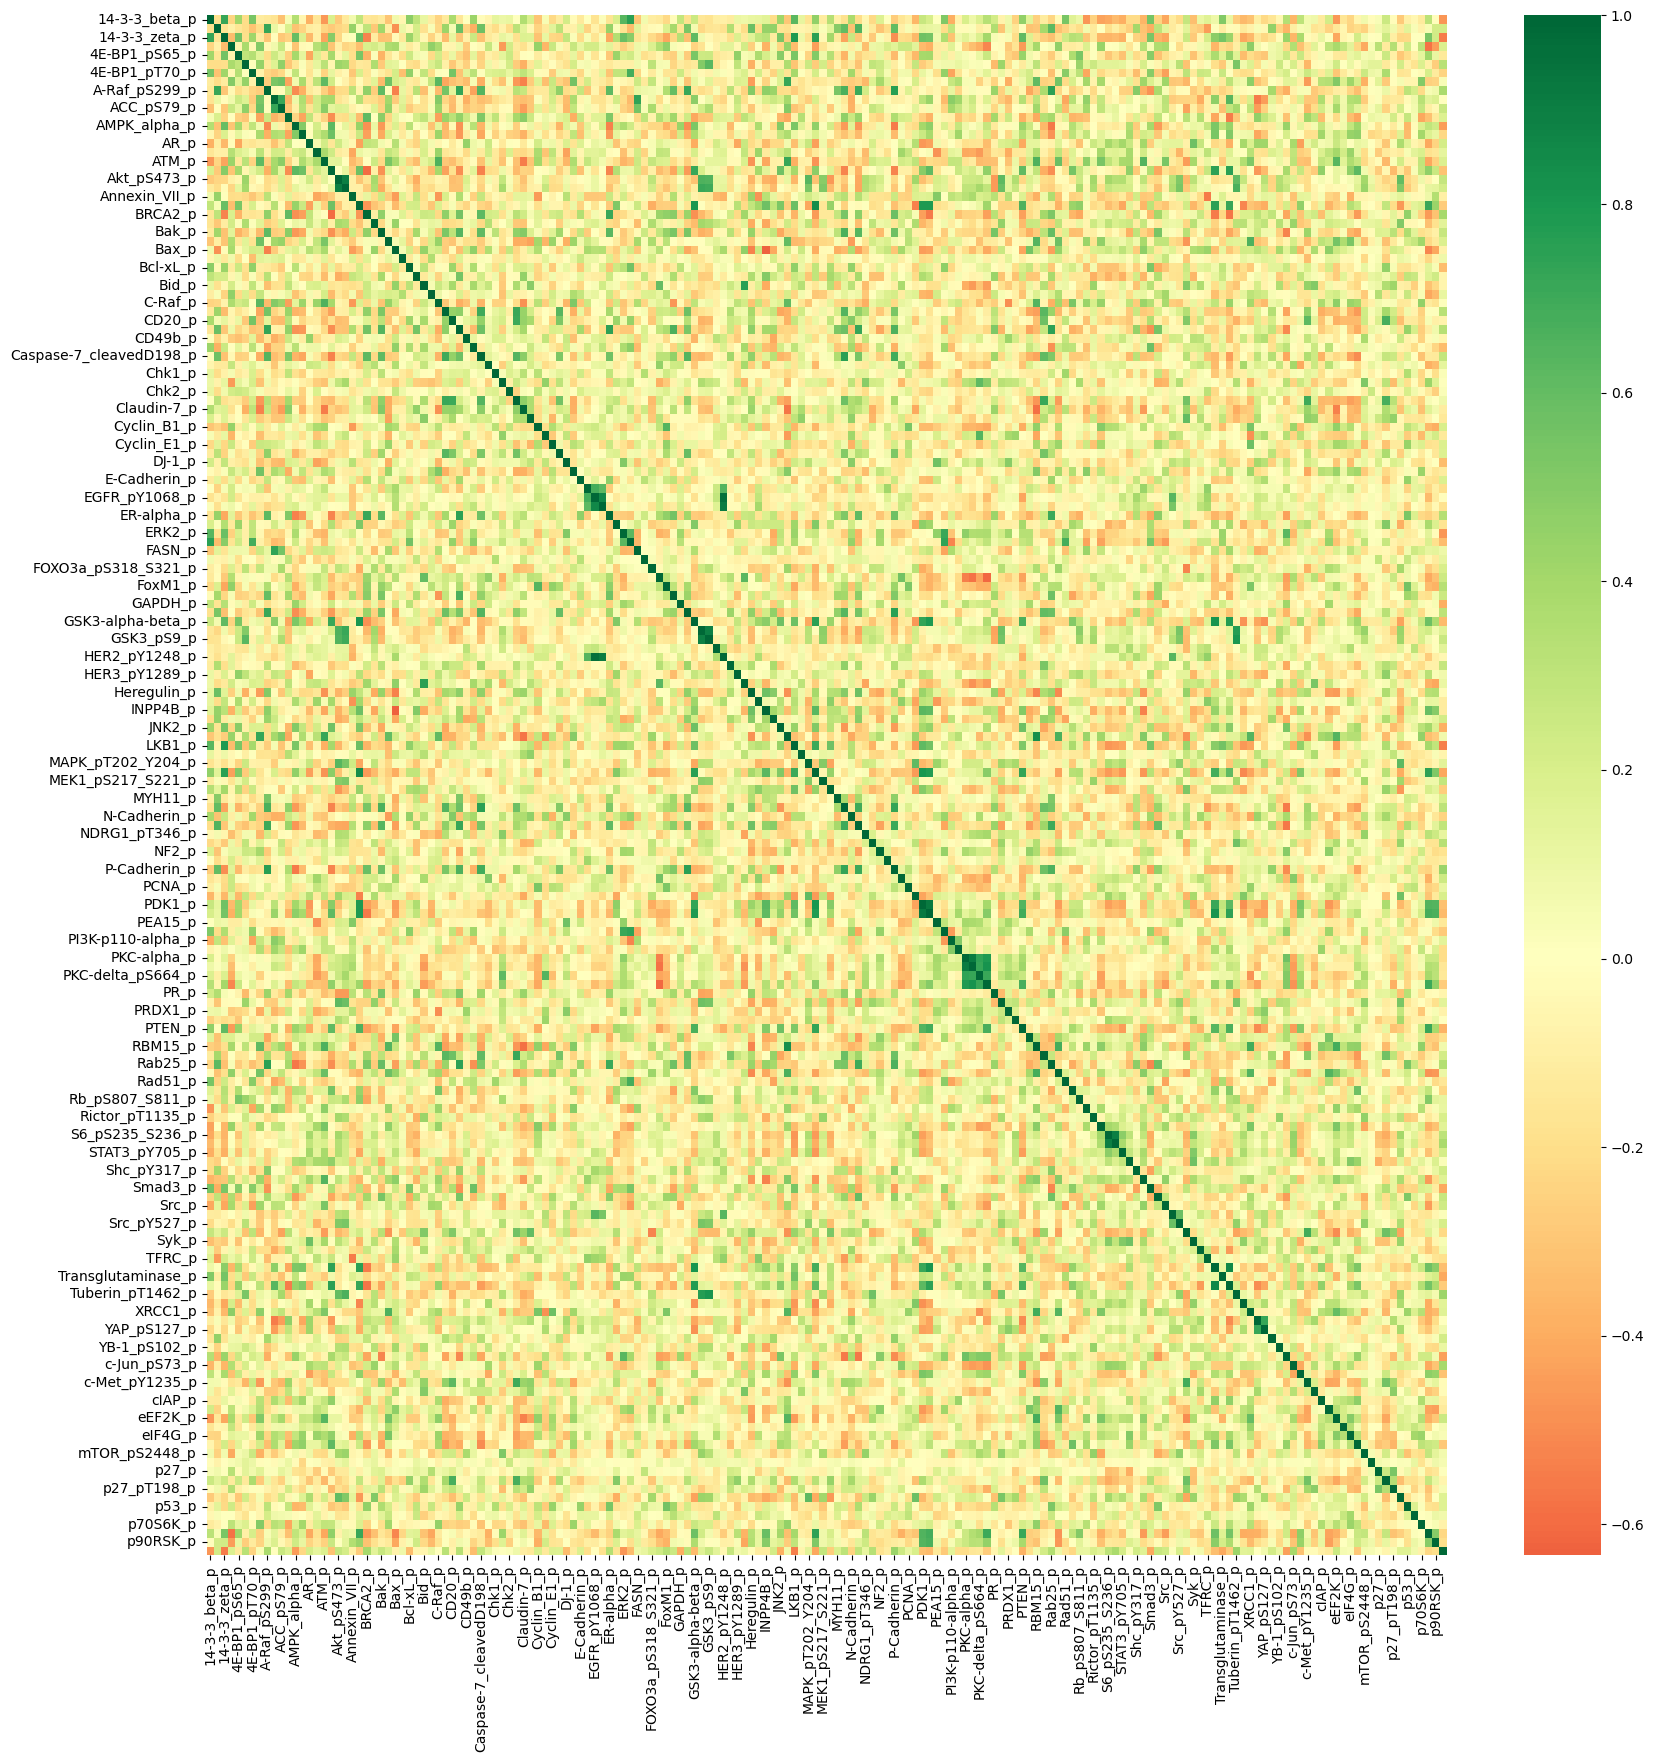

In [23]:
proteomica = data.loc[:, "14-3-3_beta_p":'p90RSK_pT359_S363_p']
corr_proteomica = proteomica.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_proteomica, cmap='RdYlGn', center=0)

<Axes: >

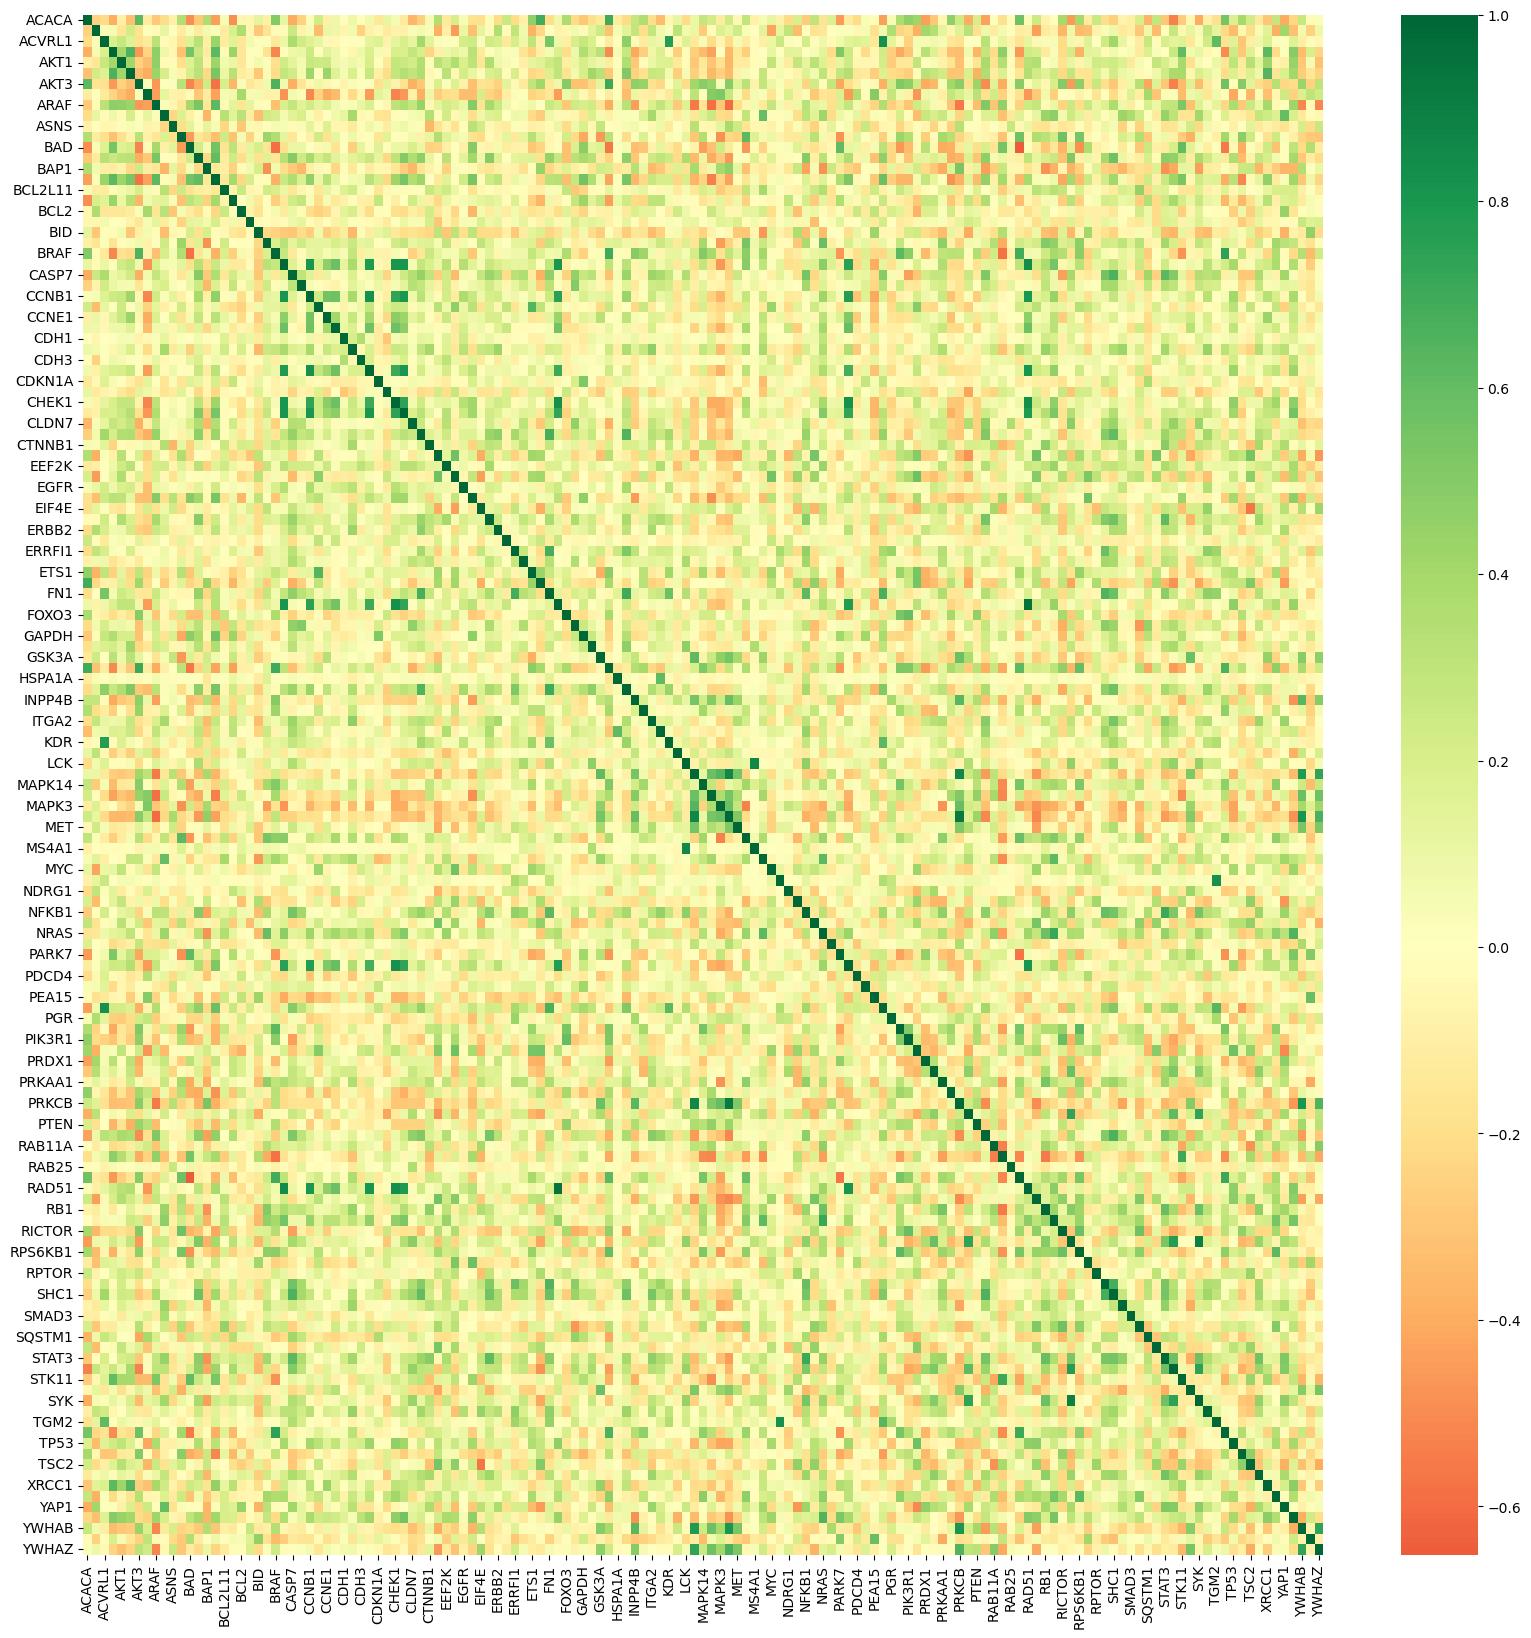

In [24]:
transcriptomica = data.loc[:, "ACACA":'YWHAZ']
corr_transcriptomica = transcriptomica.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_transcriptomica, cmap='RdYlGn', center=0)


# Pruebas de Hipotesis

In [25]:
from scipy.stats import mannwhitneyu

### Comparación del número de mutaciones entre pacientes supervivientes y fallecidos mediante prueba de Mann–Whitney U

In [26]:
grupo_vivos = datos_clinico_moleculares[datos_clinico_moleculares['outcome'] == 0]['Mutation.Count']
grupo_muertos = datos_clinico_moleculares[datos_clinico_moleculares['outcome'] == 1]['Mutation.Count']

In [27]:
# Test de Mann–Whitney U
stat, p = mannwhitneyu(grupo_vivos, grupo_muertos, alternative='two-sided')

print(f'Estadístico U = {stat:.3f}, p-valor = {p:.5f}')

# Interpretación
if p < 0.05:
    print("Diferencia estadísticamente significativa entre los grupos")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos")

Estadístico U = 10295.500, p-valor = 0.22056
No hay diferencia estadísticamente significativa entre los grupos


### Comparación de la edad entre pacientes vivos y fallecidos con gliomas mediante prueba de Mann–Whitney U

In [28]:
grupo_vivos = datos_clinico_moleculares[datos_clinico_moleculares['outcome'] == 0]['years_to_birth']
grupo_muertos = datos_clinico_moleculares[datos_clinico_moleculares['outcome'] == 1]['years_to_birth']

In [29]:
# Test de Mann–Whitney U
stat, p = mannwhitneyu(grupo_vivos, grupo_muertos, alternative='two-sided')

print(f'Estadístico U = {stat:.3f}, p-valor = {p:.5f}')

# Interpretación
if p < 0.05:
    print("Diferencia estadísticamente significativa entre los grupos")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos")

Estadístico U = 13125.500, p-valor = 0.01209
Diferencia estadísticamente significativa entre los grupos


In [30]:
datos_clinico_moleculares['histological_type'].unique()

array(['astrocytoma', 'oligoastrocytoma', 'oligodendroglioma'],
      dtype=object)

### Comparación de la edad entre pacientes con distintos tipos histologicos mediante ANOVA

In [31]:
astrocytoma = datos_clinico_moleculares[datos_clinico_moleculares['histological_type'] == 'astrocytoma']['years_to_birth']
oligoastrocytoma = datos_clinico_moleculares[datos_clinico_moleculares['histological_type'] == 'oligoastrocytoma']['years_to_birth']
oligodendroglioma = datos_clinico_moleculares[datos_clinico_moleculares['histological_type'] == 'oligodendroglioma']['years_to_birth']

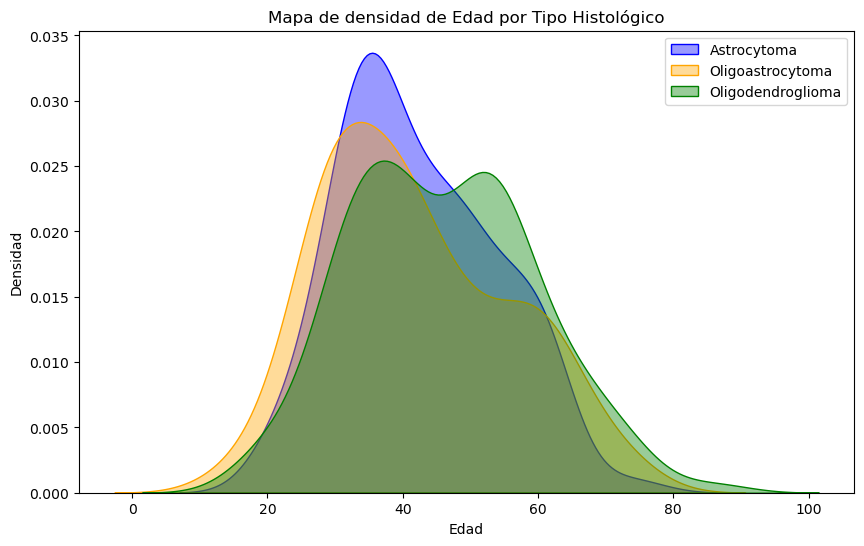

In [32]:
# KDE 
plt.figure(figsize=(10,6))
sns.kdeplot(astrocytoma, color="blue", label="Astrocytoma", fill=True, alpha=0.4)
sns.kdeplot(oligoastrocytoma, color="orange", label="Oligoastrocytoma", fill=True, alpha=0.4)
sns.kdeplot(oligodendroglioma, color="green", label="Oligodendroglioma", fill=True, alpha=0.4)

plt.legend()
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.title("Mapa de densidad de Edad por Tipo Histológico")
plt.show()


<Axes: xlabel='histological_type', ylabel='years_to_birth'>

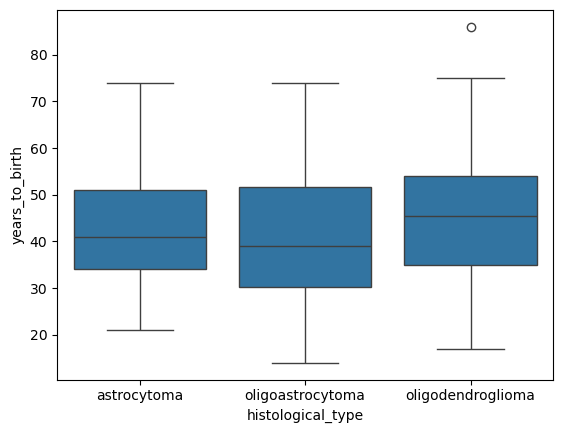

In [33]:
sns.boxplot(x=datos_clinico_moleculares['histological_type'], y = datos_clinico_moleculares['years_to_birth'])

In [34]:
datos_clinico_moleculares.groupby('histological_type')['years_to_birth'].describe()

,count,mean,std,min,25%,50%,75%,max
histological_type,,,,,,,,
astrocytoma,90.0,42.333333,11.466610,21.0,34.00,41.0,51.00,74.0
oligoastrocytoma,94.0,41.797872,13.745443,14.0,30.25,39.0,51.75,74.0
oligodendroglioma,122.0,45.942623,13.533124,17.0,35.00,45.5,54.00,86.0


In [35]:
from scipy import stats

# ANOVA de un factor
f_stat, p = stats.f_oneway(astrocytoma, oligoastrocytoma, oligodendroglioma)

print("F-statistic:", f_stat)
print("p-value:", p)
# Interpretación
if p < 0.05:
    print("Diferencia estadísticamente significativa entre los grupos")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos")

F-statistic: 3.2965948410362214
p-value: 0.03834081324391145
Diferencia estadísticamente significativa entre los grupos


In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# Tukey HSD
tukey = pairwise_tukeyhsd(endog=datos_clinico_moleculares['years_to_birth'],  # variable dependiente
                          groups=datos_clinico_moleculares['histological_type'], # factor
                          alpha=0.05)         # nivel de significancia

print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1            group2      meandiff p-adj   lower  upper  reject
------------------------------------------------------------------------
     astrocytoma  oligoastrocytoma  -0.5355 0.9581  -5.061 3.9901  False
     astrocytoma oligodendroglioma   3.6093 0.1155 -0.6547 7.8733  False
oligoastrocytoma oligodendroglioma   4.1448 0.0548 -0.0667 8.3562  False
------------------------------------------------------------------------


### Comparación de supervivencia entre pacientes con gliomas de grado 2 y 3 mediante prueba de Chi-Cuadrada

In [37]:
from scipy.stats import chi2_contingency

In [38]:
tabla = pd.crosstab(datos_clinico_moleculares['Grade'], datos_clinico_moleculares['outcome'])
tabla

outcome,0,1
Grade,,
G2,72,74
G3,50,110


In [39]:
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2 = {chi2}, p-value = {p}")
# Interpretación
if p < 0.05:
    print("Diferencia estadísticamente significativa entre los grupos")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos")

Chi2 = 9.652043691996846, p-value = 0.0018914103885985679
Diferencia estadísticamente significativa entre los grupos


### Asociación entre tipo y grado histológico en pacientes con gliomas mediante Chi-cuadrada

In [40]:
tabla = pd.crosstab(datos_clinico_moleculares['Grade'], datos_clinico_moleculares['histological_type'])
tabla

histological_type,astrocytoma,oligoastrocytoma,oligodendroglioma
Grade,,,
G2,24,50,72
G3,66,44,50


In [41]:
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2 = {chi2}, p-value = {p}")
# Interpretación
if p < 0.05:
    print("Diferencia estadísticamente significativa entre los grupos")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos")

Chi2 = 23.358563387818876, p-value = 8.467445455462368e-06
Diferencia estadísticamente significativa entre los grupos


### Asociación entre el uso de radioterapia y grado histológico en pacientes con gliomas mediante Chi-cuadrada

In [42]:
tabla = pd.crosstab(datos_clinico_moleculares['Grade'], datos_clinico_moleculares['radiation_therapy'])
tabla

radiation_therapy,no,yes
Grade,,
G2,81,65
G3,30,130


In [43]:
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2 = {chi2}, p-value = {p}")
# Interpretación
if p < 0.05:
    print("Diferencia estadísticamente significativa entre los grupos")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos")

Chi2 = 42.97708800871473, p-value = 5.5384709724521474e-11
Diferencia estadísticamente significativa entre los grupos


### Asociación entre el uso de radioterapia y el tipo histológico en pacientes con gliomas mediante Chi-cuadrada

In [44]:
tabla = pd.crosstab(datos_clinico_moleculares['histological_type'], datos_clinico_moleculares['radiation_therapy'])
tabla

radiation_therapy,no,yes
histological_type,,
astrocytoma,15,75
oligoastrocytoma,36,58
oligodendroglioma,60,62


In [45]:
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2 = {chi2}, p-value = {p}")
# Interpretación
if p < 0.05:
    print("Diferencia estadísticamente significativa entre los grupos")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos")

Chi2 = 23.925846847088565, p-value = 6.376294532937546e-06
Diferencia estadísticamente significativa entre los grupos


### Comparación de supervivencia entre pacientes con uso de radioterapia mediante prueba de Chi-Cuadrada

In [46]:
tabla = pd.crosstab(datos_clinico_moleculares['radiation_therapy'], datos_clinico_moleculares['outcome'])
tabla

outcome,0,1
radiation_therapy,,
no,60,51
yes,62,133


In [47]:
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2 = {chi2}, p-value = {p}")
# Interpretación
if p < 0.05:
    print("Diferencia estadísticamente significativa entre los grupos")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos")

Chi2 = 13.705329424769914, p-value = 0.00021384678226069105
Diferencia estadísticamente significativa entre los grupos


### Comparación de supervivencia por genero mediante prueba de Chi-Cuadrada

In [48]:
tabla = pd.crosstab(datos_clinico_moleculares['gender'], datos_clinico_moleculares['outcome'])
tabla

outcome,0,1
gender,,
female,53,83
male,69,101


In [49]:
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2 = {chi2}, p-value = {p}")
# Interpretación
if p < 0.05:
    print("Diferencia estadísticamente significativa entre los grupos")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos")

Chi2 = 0.028796552031361684, p-value = 0.8652496379939447
No hay diferencia estadísticamente significativa entre los grupos


### Comparación de supervivencia por raza mediante prueba de Chi-Cuadrada

In [50]:
tabla = pd.crosstab(datos_clinico_moleculares['race'], datos_clinico_moleculares['outcome'])
tabla

outcome,0,1
race,,
asian,3,2
black or african american,4,8
white,115,174


In [51]:
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2 = {chi2}, p-value = {p}")
# Interpretación
if p < 0.05:
    print("Diferencia estadísticamente significativa entre los grupos")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos")

Chi2 = 1.0597291518175338, p-value = 0.5886846863691275
No hay diferencia estadísticamente significativa entre los grupos


### Comparación de supervivencia por etnia mediante prueba de Chi-Cuadrada

In [52]:
tabla = pd.crosstab(datos_clinico_moleculares['ethnicity'], datos_clinico_moleculares['outcome'])
tabla

outcome,0,1
ethnicity,,
hispanic or latino,6,4
not hispanic or latino,116,180


In [53]:
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2 = {chi2}, p-value = {p}")
# Interpretación
if p < 0.05:
    print("Diferencia estadísticamente significativa entre los grupos")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos")

Chi2 = 0.9872202242780916, p-value = 0.3204227263170073
No hay diferencia estadísticamente significativa entre los grupos


### Comparación de supervivencia de acuerdo a el estado de mutacion en el gen IDH mediante prueba de Chi-Cuadrada

In [54]:
tabla = pd.crosstab(datos_clinico_moleculares['IDH.status'], datos_clinico_moleculares['outcome'])
tabla

outcome,0,1
IDH.status,,
Mutant,116,153
WT,6,31


In [55]:
chi2, p, dof, expected = chi2_contingency(tabla)
print(f"Chi2 = {chi2}, p-value = {p}")
# Interpretación
if p < 0.05:
    print("Diferencia estadísticamente significativa entre los grupos")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos")

Chi2 = 8.73197600532911, p-value = 0.0031267745272761
Diferencia estadísticamente significativa entre los grupos


### Comparación del porcentaje de aneploudía entre pacientes vivos y fallecidos con gliomas mediante prueba de Mann–Whitney U

In [56]:
datos_clinico_moleculares.columns

Index(['Case', 'years_to_birth', 'gender', 'histological_type', 'race',
       'ethnicity', 'radiation_therapy', 'Grade', 'Mutation.Count',
       'Percent.aneuploidy', 'IDH.status', 'outcome', 'radiation_therapy_N',
       'Grade_N', 'gender_N', 'IDH.status_N', 'histological_type_astrocytoma',
       'histological_type_oligoastrocytoma',
       'histological_type_oligodendroglioma'],
      dtype='object')

In [57]:
grupo_vivos = datos_clinico_moleculares[datos_clinico_moleculares['outcome'] == 0]['Percent.aneuploidy']
grupo_muertos = datos_clinico_moleculares[datos_clinico_moleculares['outcome'] == 1]['Percent.aneuploidy']

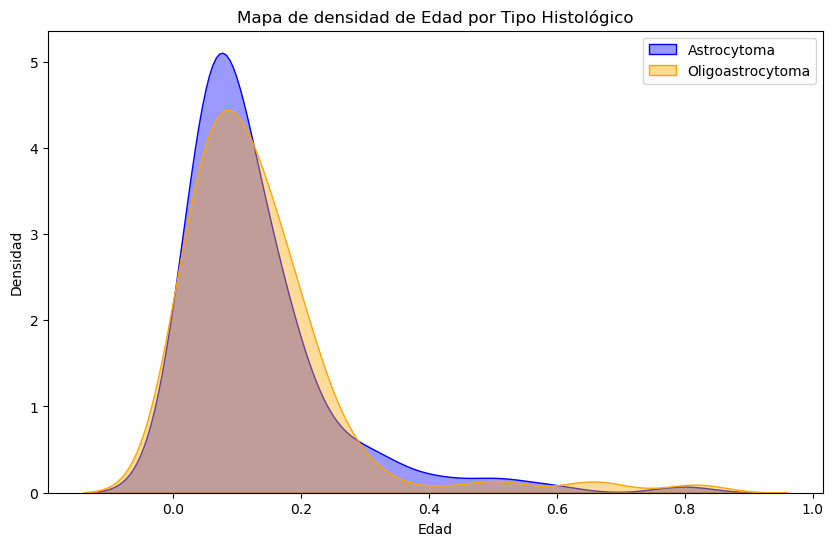

In [58]:
# KDE 
plt.figure(figsize=(10,6))
sns.kdeplot(grupo_vivos, color="blue", label="Astrocytoma", fill=True, alpha=0.4)
sns.kdeplot(grupo_muertos, color="orange", label="Oligoastrocytoma", fill=True, alpha=0.4)

plt.legend()
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.title("Mapa de densidad de Edad por Tipo Histológico")
plt.show()


In [59]:
# Test de Mann–Whitney U
stat, p = mannwhitneyu(grupo_vivos, grupo_muertos, alternative='two-sided')

print(f'Estadístico U = {stat:.3f}, p-valor = {p:.5f}')

# Interpretación
if p < 0.05:
    print("Diferencia estadísticamente significativa entre los grupos")
else:
    print("No hay diferencia estadísticamente significativa entre los grupos")

Estadístico U = 10862.000, p-valor = 0.63334
No hay diferencia estadísticamente significativa entre los grupos


# Conclusión de Pruebas de Hipótesis en Pacientes con Gliomas

1. Edad:

- Los pacientes fallecidos tienden a ser ligeramente más jóvenes que los sobrevivientes (Mann–Whitney U, p = 0.012).

- Esto probablemente refleja un sesgo por subtipo: los gliomas más agresivos (astrocytoma y oligoastrocytoma) afectan con mayor frecuencia a pacientes más jóvenes, mientras que los oligodendrogliomas, de mejor pronóstico, se concentran en pacientes mayores.

- Aunque la ANOVA por tipo histológico no mostró diferencias significativas entre pares de grupos individuales (Tukey HSD), la tendencia general respalda que los tipos histológicos agresivos predominan en pacientes jóvenes.

2. Número de mutaciones:

- No se encontraron diferencias significativas entre supervivientes y fallecidos (Mann–Whitney U, p = 0.22), sugiriendo que la carga mutacional por sí sola no discrimina el desenlace clínico.

3. Grado y tipo histológico:

- Supervivencia significativamente mayor en pacientes con oligodendroglioma y mortalidad concentrada en astrocytoma y oligoastrocytoma (Chi-cuadrada, p < 0.001).

- Asociación significativa entre tipo histológico y grado tumoral (Chi-cuadrada, p < 0.00001), indicando que los subtipos agresivos se corresponden con grados más avanzados.

4. Radioterapia:

- El uso de radioterapia se asocia con tumores de mayor grado y tipo histológico más agresivo (Chi-cuadrada, p < 0.0000000001).

- La comparación de supervivencia por radioterapia muestra diferencia significativa (p < 0.001), reflejando que los pacientes tratados con radioterapia presentan casos más severos, no necesariamente que el tratamiento sea perjudicial.

5. Estado IDH:

- Los pacientes con mutación en IDH presentan mejor pronóstico (Chi-cuadrada, p = 0.003), consistente con la literatura que asocia mutaciones IDH con menor agresividad tumoral.

6. Sexo, raza y etnia:

- No se encontraron diferencias significativas en supervivencia según género (p = 0.865), raza (p = 0.588) o etnia (p = 0.320), indicando que estas variables no influyen de forma detectable en este cohort.

7. Porcentaje de aneuploidía:

- No se observó diferencia significativa entre sobrevivientes y fallecidos (Mann–Whitney U, p = 0.633).

## Interpretación Integrada

1. La edad y el tipo histológico son factores interrelacionados que afectan la supervivencia: los pacientes más jóvenes tienden a presentar gliomas más agresivos (al menos en la población estudiada), explicando la diferencia estadística en edad entre supervivientes y fallecidos.

2. La mutación en IDH emerge como un biomarcador favorable, mientras que el tipo histológico y el grado tumoral son los principales determinantes del desenlace clínico.

3. Variables como género, raza, etnia y carga mutacional muestran poca influencia individual en este dataset.

4. Los tratamientos como radioterapia reflejan la severidad del caso más que un efecto directo sobre la supervivencia.